In [43]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import random
from PIL import Image
import json

In [44]:
charsFile = open("chars.json")
chars = json.load(charsFile)

In [45]:
def read_data(directory, split):
    print("="*50)
    print("Reading data...")
    print("="*50)
    files = os.listdir(directory)
    files = list(filter(lambda f: ".png" in f, files))
    random.shuffle(files)
    binData = []
    labels = []
    for f in files:
        img = mpimg.imread(directory + "/" + f)
        binImg = []
        label = f.split("-")[0]
        for row in img:
            newRow = []
            for cell in row:
                newRow.append((255 - sum(np.array(cell) * 255) / 4) / 255)
            binImg.append(newRow)
        binData.append(binImg)
        labels.append(int(label))
    print("Done.")
    if split:
        return (binData[:6000], labels[:6000]), (binData[6000:], labels[6000:])
    else:
        return binData


In [46]:
(x_train, y_train), (x_test, y_test) = read_data("png", True)

Reading data...
Done.


In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(125, activation="softmax")
])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 125)               62625     
Total params: 705,625
Trainable params: 705,625
Non-trainable params: 0
_________________________________________________________________


In [49]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

In [51]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0767 - accuracy: 0.9812
Epoch 2/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0462 - accuracy: 0.9875
Epoch 3/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0631 - accuracy: 0.9850
Epoch 4/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0467 - accuracy: 0.9893
Epoch 5/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0370 - accuracy: 0.9918
Epoch 6/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 0.9933
Epoch 7/15
188/188 [==============================] - 1s 7ms/step - loss: 0.1179 - accuracy: 0.9737
Epoch 8/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0702 - accuracy: 0.9823
Epoch 9/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0221 - accuracy: 0.9950
Epoch 10/15
188/188 [==============================] - 1s 7ms/step - loss: 0.0641 - accuracy: 0.9867

In [52]:
model.evaluate(x_test,  y_test, verbose=2)

24/24 - 0s - loss: 0.0200 - accuracy: 0.9907


[0.019955191761255264, 0.9906666874885559]

In [53]:
def pred(x, index):
    img = x[index]
    plt.imshow(img)
    predected = model.predict(x[index:index+1])
    print(np.max(predected))
    i = np.where(predected == np.max(predected))[1][0]
    print(chars[i].replace("ـ", ""))

0.9989274
آ


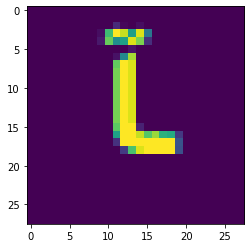

In [54]:
pred(x_test, 9)

In [55]:
x = read_data("pred", False)

Reading data...
Done.


0.9982988
ط


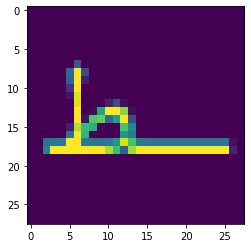

In [80]:
pred(x, 23)